
Primeras filas del dataset:
   Temperatura  Personas  Electrodomesticos  Consumo_kWh
0    21.727682       4.0                NaN    59.778753
1    25.371540       4.0               17.0    57.662018
2    23.733235       2.0               14.0    56.106590
3    15.498269       4.0               15.0    53.689339
4    29.592559       4.0                5.0    46.772408

Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63099 entries, 0 to 63098
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperatura        59945 non-null  float64
 1   Personas           59945 non-null  float64
 2   Electrodomesticos  59945 non-null  float64
 3   Consumo_kWh        59945 non-null  float64
dtypes: float64(4)
memory usage: 1.9 MB
None

Estadísticas básicas:
        Temperatura      Personas  Electrodomesticos   Consumo_kWh
count  59945.000000  59945.000000       59945.000000  59945.000000
mean     

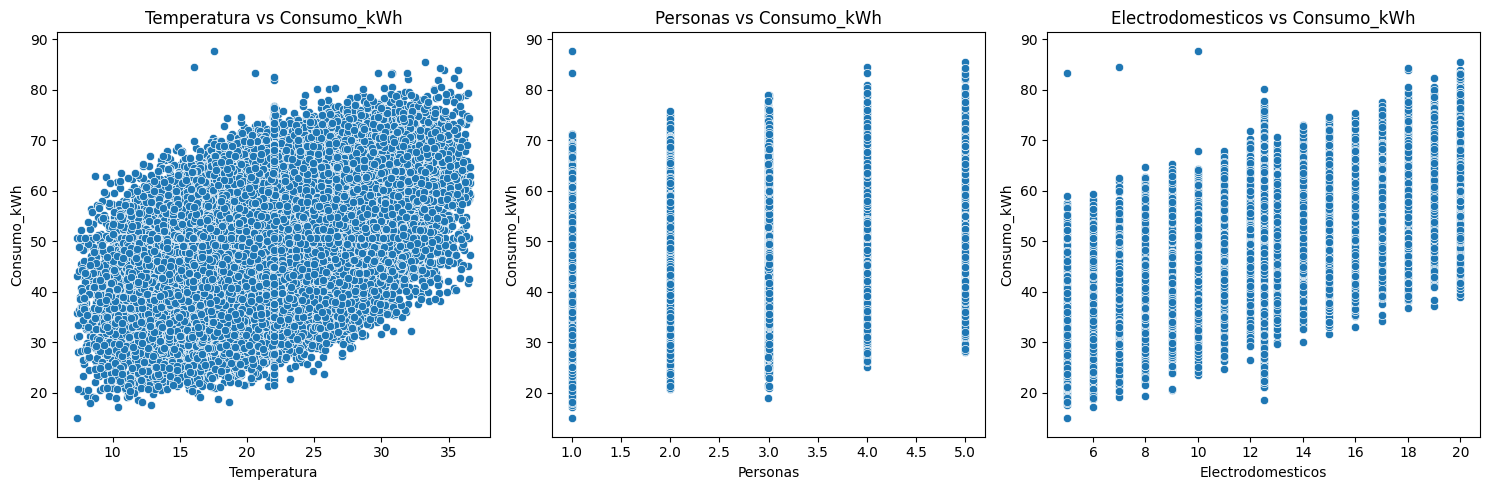


Regresión Lineal:
Coeficientes: [0.80548257 3.0431457  1.61575487]
Intercepto: 2.6111338115731755

Evaluación de modelos:
                         Modelo        MSE        R2
0              Regresión Lineal  18.612939  0.819120
1  Regresión Polinómica grado 2  18.626439  0.818989
2  Regresión Polinómica grado 3  18.623570  0.819017


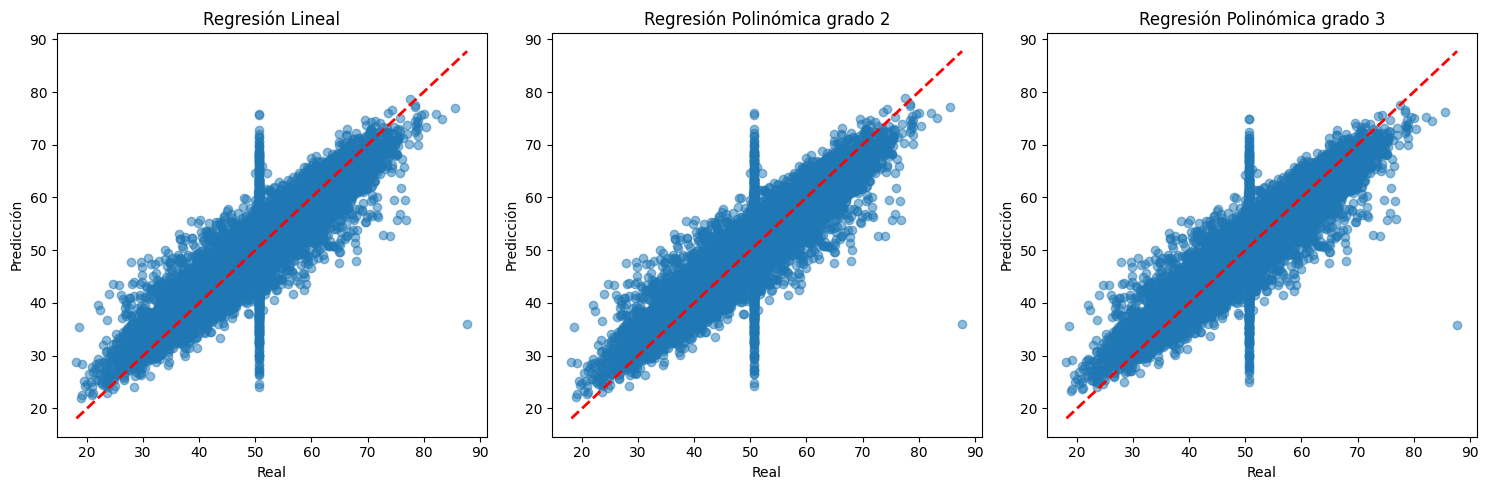


Conclusiones:
→ El modelo que mejor se ajusta es: Regresión Lineal con R2 = 0.8191
→ Las variables más influyentes se observan en los coeficientes de la regresión lineal.
→ Puede haber sobreajuste si la diferencia de R2 entre entrenamiento y prueba es muy alta.
→ Recomendación: usar modelos no lineales si se confirma relación no lineal en los scatterplots.


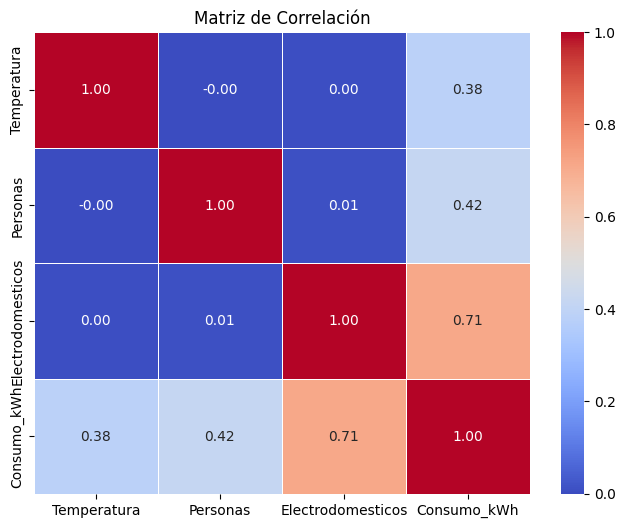

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from scipy import stats

# 1. Carga y análisis inicial
df = pd.read_csv('consumo_hogar.csv')
print("\nPrimeras filas del dataset:")
print(df.head())

print("\nInformación general:")
print(df.info())

print("\nEstadísticas básicas:")
print(df.describe())

# 2. Limpieza de datos
# Imputación de valores nulos por media
df.fillna(df.mean(numeric_only=True), inplace=True)

# Detección de outliers con Z-Score
z_scores = np.abs(stats.zscore(df.select_dtypes(include=np.number)))
df = df[(z_scores < 3).all(axis=1)]

print("\nDatos después de limpieza:")
print(df.describe())

# 3. Visualización exploratoria
plt.figure(figsize=(15, 5))
variables = ['Temperatura', 'Personas', 'Electrodomesticos']
for i, var in enumerate(variables):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(data=df, x=var, y='Consumo_kWh')
    plt.title(f'{var} vs Consumo_kWh')
plt.tight_layout()
plt.show()

# 4. Modelado
X = df[['Temperatura', 'Personas', 'Electrodomesticos']]
y = df['Consumo_kWh']

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## a) Regresión Lineal Múltiple
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

print("\nRegresión Lineal:")
print("Coeficientes:", lin_reg.coef_)
print("Intercepto:", lin_reg.intercept_)

## b) Regresión Polinómica grado 2 y 3
metrics = []

for degree in [2, 3]:
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)

    poly_reg = LinearRegression()
    poly_reg.fit(X_poly_train, y_train)
    y_pred_poly = poly_reg.predict(X_poly_test)

    mse = mean_squared_error(y_test, y_pred_poly)
    r2 = r2_score(y_test, y_pred_poly)

    metrics.append({
        'Modelo': f'Regresión Polinómica grado {degree}',
        'MSE': mse,
        'R2': r2
    })

# Métricas Regresión Lineal
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)
metrics.insert(0, {
    'Modelo': 'Regresión Lineal',
    'MSE': mse_lin,
    'R2': r2_lin
})

# 5. Evaluación y comparación
print("\nEvaluación de modelos:")
df_metrics = pd.DataFrame(metrics)
print(df_metrics)

# --- Gráfica de predicciones vs reales ---
plt.figure(figsize=(15, 5))

# Gráfico 1: Regresión Lineal
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_lin, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='--', linewidth=2)
plt.title('Regresión Lineal')
plt.xlabel('Real')
plt.ylabel('Predicción')

# Gráficos 2 y 3: Regresiones Polinómicas
for i, degree in enumerate([2, 3]):
    poly = PolynomialFeatures(degree=degree)
    X_poly_test = poly.fit_transform(X_test)
    y_pred = LinearRegression().fit(poly.fit_transform(X_train), y_train).predict(X_poly_test)

    plt.subplot(1, 3, i+2)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()],
             color='red', linestyle='--', linewidth=2)
    plt.title(f'Regresión Polinómica grado {degree}')
    plt.xlabel('Real')
    plt.ylabel('Predicción')

plt.tight_layout()
plt.savefig("regresion_polinomica.png")  # 👈 Guardar antes de mostrar
plt.show()

# 6. Conclusiones
print("\nConclusiones:")
best_model = df_metrics.sort_values('R2', ascending=False).iloc[0]
print(f"→ El modelo que mejor se ajusta es: {best_model['Modelo']} con R2 = {best_model['R2']:.4f}")
print("→ Las variables más influyentes se observan en los coeficientes de la regresión lineal.")
print("→ Puede haber sobreajuste si la diferencia de R2 entre entrenamiento y prueba es muy alta.")
print("→ Recomendación: usar modelos no lineales si se confirma relación no lineal en los scatterplots.")

# 7. Matriz de correlación
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.savefig("matriz_correlacion.png")  # 👈 Guardar antes de mostrar
plt.show()
